In [1]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine


In [35]:
database_username = 'galeras'
database_password = 'galeras234'
database_ip       = '192.168.0.1'
database_name     = 'galeras'
database_port     = '6603' # replace with your port
database_connection = create_engine('mysql+pymysql://{0}:{1}@{2}:{3}/{4}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_port, database_name))


chunk_size = 50000
offset = 0
frames = []

In [36]:
while True:
    sql = "SELECT * FROM repo_code_dataset LIMIT %d OFFSET %d" % (chunk_size, offset)
    df = pd.read_sql_query(sql, database_connection)
    
    if len(df) == 0:
        break

    frames.append(df)
    offset += chunk_size



In [37]:
# Concatenate all the dataframes in the list.
full_df = pd.concat(frames)

In [38]:
full_df.shape

(338615, 21)

In [15]:
keys = ["n_ast_errors","ast_levels","n_whitespaces","n_words","vocab_size","complexity","nloc","token_counts","n_ast_nodes","n_identifiers" ]

In [11]:
full_df.head()

,id,commit_id,repo,path,file_name,fun_name,commit_message,code,url,language,...,n_ast_errors,ast_levels,n_whitespaces,n_words,vocab_size,complexity,nloc,token_counts,n_ast_nodes,n_identifiers
0,1,71899ca1e72afd7067b5fe609c69714da48a55a0,ailearning,src/py3.x/ml/16.RecommenderSystems/RS-usercf.py,RS-usercf.py,calc_user_sim,修复原来删除 nlp的内容，迁移到 docs/nlp_old 下面,def calc_user_sim(self):\n \n\n ...,https://github.com/apachecn/ailearning.git,Python,...,0,18,954,256,119,12,36,306,511,32
1,2,71899ca1e72afd7067b5fe609c69714da48a55a0,ailearning,src/py3.x/ml/16.RecommenderSystems/RS-usercf.py,RS-usercf.py,recommend,修复原来删除 nlp的内容，迁移到 docs/nlp_old 下面,"def recommend(self, user):\n \n ...",https://github.com/apachecn/ailearning.git,Python,...,0,12,283,70,51,4,22,131,211,22
2,3,71899ca1e72afd7067b5fe609c69714da48a55a0,ailearning,src/py3.x/ml/16.RecommenderSystems/RS-usercf.py,RS-usercf.py,main,修复原来删除 nlp的内容，迁移到 docs/nlp_old 下面,"def main():\n path_root = ""/Users/jiangzl/w...",https://github.com/apachecn/ailearning.git,Python,...,0,8,78,41,28,1,6,35,82,10
3,4,71899ca1e72afd7067b5fe609c69714da48a55a0,ailearning,tutorials/RecommenderSystems/rs_content_demo.py,rs_content_demo.py,rs_2_cb_recommend_estimate,修复原来删除 nlp的内容，迁移到 docs/nlp_old 下面,"def rs_2_cb_recommend_estimate(user_feature, i...",https://github.com/apachecn/ailearning.git,Python,...,0,11,110,56,41,1,9,97,158,20
4,5,71899ca1e72afd7067b5fe609c69714da48a55a0,ailearning,tutorials/RecommenderSystems/rs_content_demo.py,rs_content_demo.py,create_item2feature,修复原来删除 nlp的内容，迁移到 docs/nlp_old 下面,"def create_item2feature(infile, outfile):\n ...",https://github.com/apachecn/ailearning.git,Python,...,0,12,85,47,37,3,19,199,182,20


In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Galeras dataset - Feature distribution')

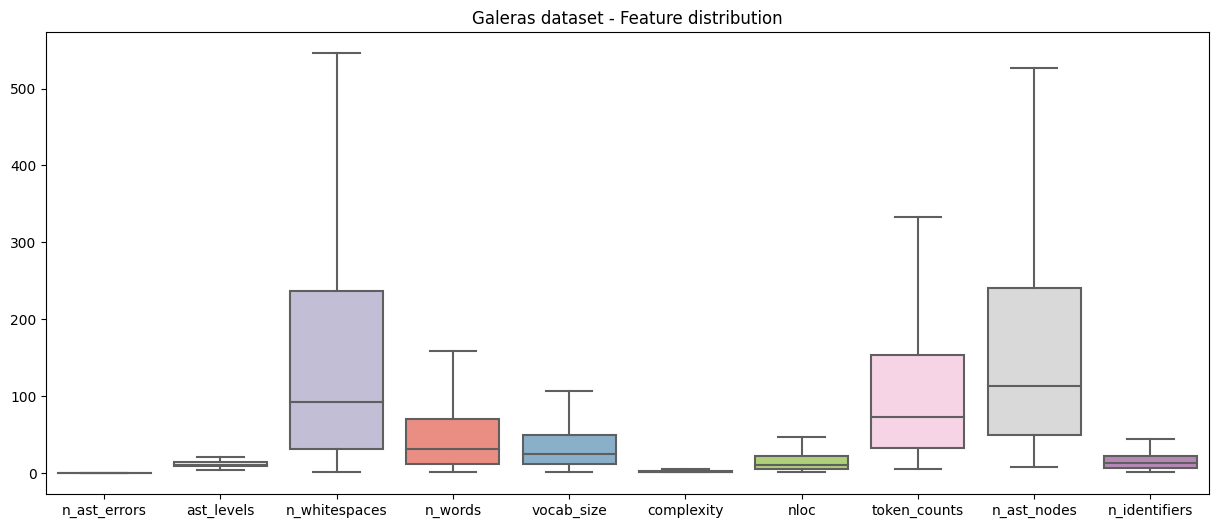

In [25]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=full_df[keys], showfliers=False,palette="Set3").set_title("Galeras dataset - Feature distribution")

## Documentation dataset

In [44]:
frames = list()
offset=0
while True:
    sql = "SELECT * FROM repo_documentation where language like 'en' LIMIT %d OFFSET %d" % (chunk_size, offset)
    df = pd.read_sql_query(sql, database_connection)
    
    if len(df) == 0:
        break

    frames.append(df)
    offset += chunk_size


In [46]:
documentation_df = pd.concat(frames)

In [47]:
documentation_df.head()

,id,datapoint_id,docstring,n_words,vocab_size,n_whitespaces,language
0,12,20,Return the type of protobuf object which store...,112,63,182,en
1,13,21,Returns a protobuf serialization of self.\n\n ...,68,56,150,en
2,14,22,Return the type of protobuf object which store...,112,63,182,en
3,15,24,Returns the application data of all the applic...,16,14,41,en
4,16,28,Returns the increment between each index for s...,8,8,7,en


In [51]:
doc_keys =["n_words","vocab_size","n_whitespaces","language"]

Text(0.5, 1.0, 'Galeras dataset - Docstring - Feature distribution')

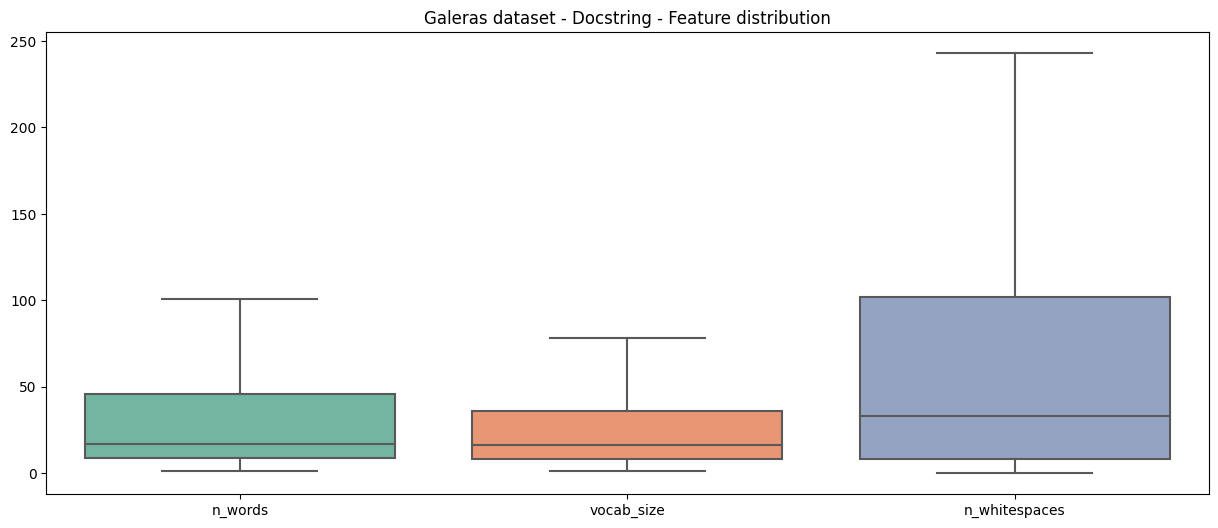

In [53]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(data=documentation_df[doc_keys], showfliers=False,palette="Set2").set_title("Galeras dataset - Docstring - Feature distribution")